In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette('coolwarm')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing files
train = pd.read_csv('/Users/ranjansahoo/Downloads/boston-housing/train.csv')
test = pd.read_csv('/Users/ranjansahoo/Downloads/boston-housing/test.csv')

In [3]:
# Viewing the head of train
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
# Checking the shape
train.shape

(333, 15)

In [5]:
# As well as viewing the head of test file
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


#### Housing Values in Suburbs of Boston
The **medv** variable is the target variable.

#### Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

 - **crim :** per capita crime rate by town.
 - **zn :** proportion of residential land zoned for lots over 25,000 sq.ft.
 - **indus :** proportion of non-retail business acres per town.
 - **chas :** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
 - **nox :** nitrogen oxides concentration (parts per 10 million).
 - **rm :** average number of rooms per dwelling.
 - **age :** proportion of owner-occupied units built prior to 1940.
 - **dis :** weighted mean of distances to five Boston employment centres.
 - **rad :** index of accessibility to radial highways.
 - **tax :** full-value property-tax rate per \$10,000.
 - **ptratio :** pupil-teacher ratio by town.
 - **black :** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
 - **lstat :** lower status of the population (percent).
 - **medv :** median value of owner-occupied homes in \$1000s.

In [6]:
# Description of train dataset
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,333.0,250.951952,147.859438,1.00000,123.00000,244.00000,377.00000,506.0000
crim,333.0,3.360341,7.352272,0.00632,0.07896,0.26169,3.67822,73.5341
zn,333.0,10.689189,22.674762,0.00000,0.00000,0.00000,12.50000,100.0000
indus,333.0,11.293483,6.998123,0.74000,5.13000,9.90000,18.10000,27.7400
chas,333.0,0.060060,0.237956,0.00000,0.00000,0.00000,0.00000,1.0000
nox,333.0,0.557144,0.114955,0.38500,0.45300,0.53800,0.63100,0.8710
rm,333.0,6.265619,0.703952,3.56100,5.88400,6.20200,6.59500,8.7250
age,333.0,68.226426,28.133344,6.00000,45.40000,76.70000,93.80000,100.0000
dis,333.0,3.709934,1.981123,1.12960,2.12240,3.09230,5.11670,10.7103
rad,333.0,9.633634,8.742174,1.00000,4.00000,5.00000,24.00000,24.0000


In [7]:
# Columns information with null count
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


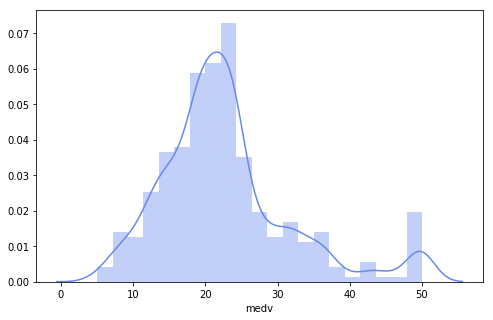

In [8]:
# Viewing the distribution of target column
plt.figure(figsize=(8,5))
sns.distplot(train['medv'])
plt.show()

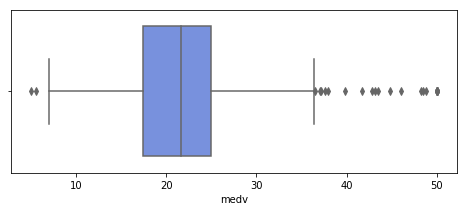

In [9]:
# Viewing the distribution of target column by boxplot
plt.figure(figsize=(8,3))
sns.boxplot(train['medv'])
plt.show()

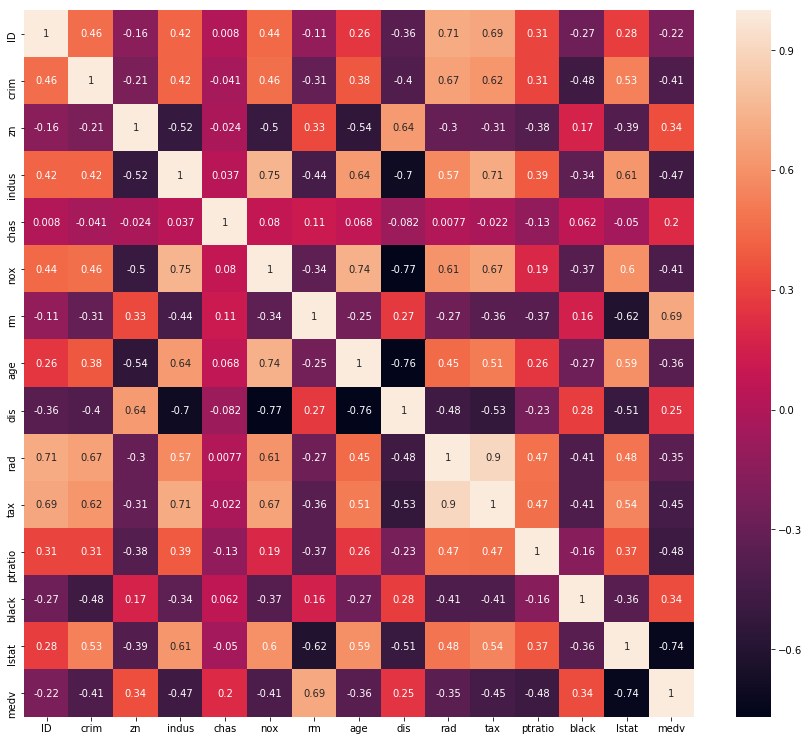

In [10]:
# Correlation of train dataset 
plt.figure(figsize=(15,13))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [11]:
# Creating predict and target columns
x = train.drop('medv', axis = 1)
y = train.medv

In [12]:
# droping the not needed columns
x = x.drop(['ID','zn','chas','age','dis','rad','black'], axis = 1)

In [13]:
# After droping checking the head of predict columns
x.head()

,crim,indus,nox,rm,tax,ptratio,lstat
0,0.00632,2.31,0.538,6.575,296,15.3,4.98
1,0.02731,7.07,0.469,6.421,242,17.8,9.14
2,0.03237,2.18,0.458,6.998,222,18.7,2.94
3,0.06905,2.18,0.458,7.147,222,18.7,5.33
4,0.08829,7.87,0.524,6.012,311,15.2,12.43


In [14]:
# Shape of predict columns
x.shape

(333, 7)

In [15]:
# Spliting dataset for train and test
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .25, random_state = 6)

# Fitting model to xtrain and ytrain
lr.fit(xtrain,ytrain)

#Predicting xtest
model_lr_pred = lr.predict(xtest)

# Checking the rmse and R2 score
rmse = np.sqrt(mean_squared_error(ytest, model_lr_pred))
R2 = r2_score(ytest, model_lr_pred)

# Printing the scores
print('RMSE Score : ', rmse)
print('R2 Score : ', R2)

RMSE Score :  6.370835266435323
R2 Score :  0.5850565604618038


In [16]:
# Applying polynomial regression
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

# Applying polynomial to linear regression
lr = LinearRegression()
lr.fit(x_poly, y)

# Predicting target after applying polynomial regression
y_poly_pred = lr.predict(x_poly)

# Checking the scores
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
R2 = r2_score(y,y_poly_pred)
print('RMSE Score : ', rmse)
print('R2 Score : ', R2)

RMSE Score :  3.2855100432064503
R2 Score :  0.871339674821565


In [17]:
# Checking the shape of x after applying polynomial regression
x_poly.shape

(333, 36)

#### As i am getting better scores after applying polynomial regression, for the final prediction i will go with polynomial regression

### Final application on test data

In [18]:
# Viewing the head of test data
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [19]:
# Droping the not needed columns
test = test.drop(['ID','zn','chas','age','dis','rad','black'], axis = 1)

In [20]:
# After droping checking the head of predict columns
test.head()

,crim,indus,nox,rm,tax,ptratio,lstat
0,0.02729,7.07,0.469,7.185,242,17.8,4.03
1,0.02985,2.18,0.458,6.430,222,18.7,5.21
2,0.14455,7.87,0.524,6.172,311,15.2,19.15
3,0.21124,7.87,0.524,5.631,311,15.2,29.93
4,0.17004,7.87,0.524,6.004,311,15.2,17.10


In [21]:
# Checking the shpe of the test dataset after droping columns
test.shape

(173, 7)

In [22]:
# Applying polynomial regression
test_poly = polynomial_features.fit_transform(test)

In [23]:
# Checking the shape of x after applying polynomial regression
test_poly.shape

(173, 36)

In [24]:
# Droping the not needed columns
train = train.drop(['ID','zn','chas','age','dis','rad','black'], axis = 1)

In [25]:
# Creating predict and target columns
x = train.drop('medv', axis = 1)
y = train.medv

In [26]:
# Fitting normal linear regression
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# Prediction after normal linear regression
lr.predict(test)

array([32.54738457, 27.28981733, 20.66831159, 11.50529076, 21.20099305,
       17.88922132, 18.83607639, 16.57421769, 14.9913355 , 17.01081604,
       21.31515124, 22.62829259,  9.5504942 , 14.29592349, 22.11033574,
       20.61674232, 22.30917529, 30.11991749,  7.74300069, 29.48669706,
       21.93523093, 25.85642382, 22.77044622, 22.61770322, 22.79257049,
       23.22138738, 25.76048541, 26.09175294, 27.00289793, 27.88003642,
       35.85679188, 35.14510362, 31.70085306, 20.23448239, 16.23199282,
       19.94016062, 19.29410848, 19.5430459 , 19.64283261, 20.91425909,
       14.88072482, 22.13915796, 22.68177511, 18.8614393 , 13.63564777,
       13.97256422,  9.6502982 , 20.79821277, 21.90562208, 20.88004832,
       24.16140317, 34.51870924, 40.02763853, 27.65927257, 18.86264808,
       21.83419089, 31.16907783, 38.55965462, 36.78972258, 35.14197246,
       31.41919814, 37.12863724, 17.11023184, 12.00170228, 18.39509008,
       18.48785623, 24.2683996 , 28.22050551, 19.9833963 , 26.51

In [28]:
# Applying polynomial to linear regression
lr = LinearRegression()
lr.fit(x_poly, y)

# Making prediction after applying model
y_poly_pred = lr.predict(test_poly)

In [29]:
y_poly_pred

array([35.3486579 , 26.86928186, 20.89396482, 24.18387454, 20.16972803,
       16.56531087, 16.78094836, 16.33469936, 15.4259524 , 16.31934281,
       18.74804334, 19.32356563, 19.68067027, 15.14999079, 20.92662041,
       19.83601968, 20.92862018, 30.90372041, 28.5402769 , 29.53836021,
       20.44595312, 24.77890445, 19.89968761, 18.45259643, 17.08319864,
       19.16432886, 24.32111588, 25.38916831, 24.37757435, 27.54487866,
       41.92515852, 40.33337437, 34.05301667, 19.61189807, 17.28715302,
       19.36862909, 16.32202971, 16.45509621, 16.58248664, 19.86174845,
       13.98724704, 20.3819487 , 21.38621072, 15.50599357, 12.65075788,
       14.36134113, 15.5999752 , 15.02463182, 16.08749837, 15.66030886,
       17.72956645, 37.0165184 , 49.10189022, 24.28530316, 21.50308241,
       24.52761683, 27.46927557, 46.70908069, 35.91854698, 32.79281439,
       30.47143759, 39.62541406, 18.07581499, 18.12399063, 18.73955256,
       18.31463479, 22.58964596, 28.31543019, 20.81263313, 26.06